### Install Fast map matching (FMM)*

Reference: Can Yang & Gyozo Gidofalvi (2018) Fast map matching, an algorithm
integrating hidden Markov model with precomputation, International Journal of Geographical Information Science, 32:3, 547-570, DOI: 10.1080/13658816.2017.1400548

https://fmm-wiki.github.io/

**Install Prerequisites**

In [ ]:
### TODO ###

# install FMM "requirements" following https://fmm-wiki.github.io/docs/installation
# You need to choose the right OS on that page
# For example, on Ubuntu you can run
# !sudo apt-get install libboost-dev libboost-serialization-dev gdal-bin libgdal-dev make cmake libbz2-dev libexpat1-dev swig python-dev

In [ ]:
# Install all the requirements with:
! sudo apt-get install libboost-dev libboost-serialization-dev \
gdal-bin libgdal-dev make cmake libbz2-dev libexpat1-dev swig

#! sudo apt-get install libboost-dev libboost-serialization-dev \
#gdal-bin libgdal-dev make cmake libbz2-dev libexpat1-dev swig python-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libboost-dev is already the newest version (1.74.0.3ubuntu7).
libboost-dev set to manually installed.
libbz2-dev is already the newest version (1.0.8-5build1).
libbz2-dev set to manually installed.
make is already the newest version (4.3-4.1build1).
make set to manually installed.
libboost-serialization-dev is already the newest version (1.74.0.3ubuntu7).
libboost-serialization-dev set to manually installed.
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
libexpat1-dev is already the newest version (2.4.7-1ubuntu0.4).
libexpat1-dev set to manually installed.
libgdal-dev is already the newest version (3.6.4+dfsg-1~jammy0).
The following additional packages will be installed:
  python3-gdal python3-numpy swig4.0
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest swig-doc swig-examples
  swig4.0-examples swig4.0-doc
The following NEW packages will be installed:


**Install FMM**

In [ ]:
!git clone https://github.com/cyang-kth/fmm.git

Cloning into 'fmm'...
remote: Enumerating objects: 5168, done.
remote: Counting objects: 100% (624/624), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 5168 (delta 470), reused 460 (delta 459), pack-reused 4544 (from 1)
Receiving objects: 100% (5168/5168), 15.33 MiB | 34.35 MiB/s, done.
Resolving deltas: 100% (3083/3083), done.


In [ ]:
# !!!! This could take ~ 6 mintues !!!!
# it may not work and requires for password, etc.
# in this case, go to your folder using console to compile and install FMM

import os
# change working directory
os.chdir("fmm")

if not os.path.exists('build'):
  os.mkdir('build')
# ! mkdir build
os.chdir("build")
# ! cd build
! cmake ..
! make -j4
! sudo make install

-- CMAKE version 3.30.5
-- Set CMP0074 state to NEW
-- Set CMP0086 state to NEW
-- Set CMP0078 state to NEW
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- 
No conda environment found in PATH!
PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin

-- Could NOT find Conda (missing: CONDA_PREFIX) 
-- Non conda exist, search library in default path
-- Found GDAL: /usr/lib/x86_64-linux-gnu/libgdal.so (found suitable version "3.6.4", 

In [ ]:
# Verfication of installation
!FMM

/bin/bash: line 1: FMM: command not found


In [ ]:
# Change to the parent folder which contains fmm_test.py
if os.getcwd() != "/content/fmm/example/python":
  os.chdir("/content/fmm/example/python")
os.system('python fmm_test.py')

256

In [ ]:
# Install osmnx package to prepare the network, that will be used as input to FMM
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


### Plot using Folium

In [ ]:
! pip install folium

In [ ]:
import osmnx as ox
import time
from shapely.geometry import Polygon
import os
import numpy as np

def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)

    # We need an unique ID for each edge
    gdf_edges["fid"] = np.arange(0, gdf_edges.shape[0], dtype='int')

    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

print("osmnx version",ox.__version__)

osmnx version 1.9.4


<ipython-input-7-a276ef7f78e2>:20: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
<ipython-input-7-a276ef7f78e2>:28: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, encoding=encoding)


--- 142.8168077468872 seconds ---


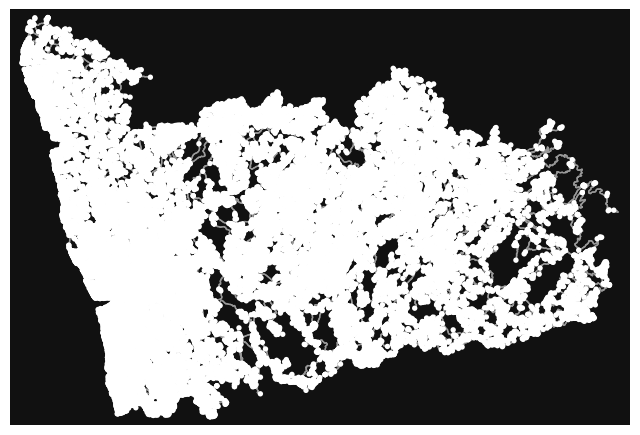

In [ ]:
place ="Porto, Portugal"

start_time = time.time()
G = ox.graph_from_place(place, network_type='drive', which_result=2)

save_graph_shapefile_directional(G, filepath='/content/data/porto')
print("--- %s seconds ---" % (time.time() - start_time))

ox.plot_graph(G)
ox.save_graphml(G)

In [ ]:
# New improvements
import os
import json
import csv
from fmm import Network, NetworkGraph, UBODTGenAlgorithm, UBODT, FastMapMatch, FastMapMatchConfig, STMATCH, STMATCHConfig

# Read network data
network = Network("/content/data/porto/edges.shp", "fid", "u", "v")
print("Nodes {} edges {}".format(network.get_node_count(), network.get_edge_count()))
graph = NetworkGraph(network)

# Precompute an UBODT table
if os.path.isfile("/content/data/ubodt.txt"):
    ubodt = UBODT.read_ubodt_csv("/content/data/ubodt.txt")
    print("Read the ubodt file")
else:
    print("Generate and read the ubodt file")
    ubodt_gen = UBODTGenAlgorithm(network, graph)
    status = ubodt_gen.generate_ubodt("/content/data/ubodt.txt", 0.03, binary=False, use_omp=True)
    print(status)
    ubodt = UBODT.read_ubodt_csv("/content/data/ubodt.txt")

# Create FMM model
fmm_model = FastMapMatch(network, graph, ubodt)

# Define map matching configurations
k = 16
radius = 0.005
gps_error = 0.0005
fmm_config = FastMapMatchConfig(k, radius, gps_error)

# Create STMATCH model
stmatch_model = STMATCH(network, graph)

# Define STMATCH map matching configurations
k = 8
radius = 0.05
gps_error = 0.005
vmax = 0.003
factor = 1.5
stmatch_config = STMATCHConfig(k, radius, gps_error, vmax, factor)

# Read trajectory data from CSV
train1500 = []
with open("/content/data/train/train-1500.csv", "r", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        polyline_str = row.get("POLYLINE")
        if polyline_str:
            try:
                row["POLYLINE"] = json.loads(polyline_str)
            except json.JSONDecodeError:
                print(f"Invalid POLYLINE format in row {row}")
                row["POLYLINE"] = []
        else:
            row["POLYLINE"] = []
        train1500.append(row)

# Process only the first 10 entries for testing
for i, trajectory in enumerate(train1500):
    polyline = trajectory["POLYLINE"]
    if not polyline:
        print(f"Empty POLYLINE for trajectory index {i}")
        continue

    # Convert polyline to WKT format
    wkt = "LINESTRING(" + ",".join([" ".join(map(str, point)) for point in polyline]) + ")"

    result = fmm_model.match_wkt(wkt, fmm_config)
    train1500[i]["MATCHING_ALGORITHM"] = "fmm"

    if not list(result.cpath):
        result = stmatch_model.match_wkt(wkt, stmatch_config)
        train1500[i]["MATCHING_ALGORITHM"] = "stmatch"
        if not list(result.cpath):
            print(f"No match found for trajectory index {i}, WKT: {wkt}")

    # Adding matched results according to your output field specifications
    train1500[i]["MATCHED_RESULTS"] = {
        "id": i,
        "ogeom": wkt,
        "opath": list(result.opath),
        "error": [c.error for c in result.candidates],
        "offset": [c.offset for c in result.candidates],
        "length": [c.length for c in result.candidates],
        "spdist": [c.spdist for c in result.candidates],
        "duration": [0] * len(result.candidates),  # Placeholder, replace with actual duration if available
        "speed": [0] * len(result.candidates),  # Placeholder, replace with actual speed if available
        "pgeom": result.pgeom.export_wkt(),
        "cpath": list(result.cpath),
        "tpath": list(result.indices),
        "mgeom": result.mgeom.export_wkt(),
        "ep": [c.ep for c in result.candidates],
        "tp": [c.tp for c in result.candidates],
        "matching_algorithm": train1500[i]["MATCHING_ALGORITHM"],
        "eid": [c.edge_id for c in result.candidates],
        "source": [c.source for c in result.candidates],
        "target": [c.target for c in result.candidates]
    }
    print(f"Processed trajectory index {i}")

# Save the results to a new CSV file
output_csv_path = "/content/data/map_matching_1500.csv"
output_dir = os.path.dirname(output_csv_path)

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Define CSV headers based on the modified field names
headers = ["id", "ogeom", "opath", "error", "offset", "length", "spdist", "duration", "speed",
           "pgeom", "cpath", "tpath", "mgeom", "ep", "tp", "MATCHING_ALGORITHM", "eid", "source", "target"]

with open(output_csv_path, "w", newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=headers)
    writer.writeheader()

    for trajectory in train1500:
        if "MATCHED_RESULTS" in trajectory:
            matched_results = trajectory["MATCHED_RESULTS"]
            flattened_row = {
                "id": matched_results["id"],
                "ogeom": matched_results["ogeom"],
                "opath": json.dumps(matched_results["opath"]),
                "error": json.dumps(matched_results["error"]),
                "offset": json.dumps(matched_results["offset"]),
                "length": json.dumps(matched_results["length"]),
                "spdist": json.dumps(matched_results["spdist"]),
                "duration": json.dumps(matched_results["duration"]),
                "speed": json.dumps(matched_results["speed"]),
                "pgeom": matched_results["pgeom"],
                "cpath": json.dumps(matched_results["cpath"]),
                "tpath": json.dumps(matched_results["tpath"]),
                "mgeom": matched_results["mgeom"],
                "ep": json.dumps(matched_results["ep"]),
                "tp": json.dumps(matched_results["tp"]),
                "MATCHING_ALGORITHM": matched_results["matching_algorithm"],
                "eid": json.dumps(matched_results["eid"]),
                "source": json.dumps(matched_results["source"]),
                "target": json.dumps(matched_results["target"])
            }
            writer.writerow(flattened_row)

print(f"Results saved to {output_csv_path}")


Nodes 81591 edges 191972
Generate and read the ubodt file
Status: success
Time takes 55.853 seconds

Processed trajectory index 0
Processed trajectory index 1
Processed trajectory index 2
Processed trajectory index 3
Processed trajectory index 4
Processed trajectory index 5
Processed trajectory index 6
Processed trajectory index 7
Processed trajectory index 8
Processed trajectory index 9
Processed trajectory index 10
Processed trajectory index 11
Processed trajectory index 12
Processed trajectory index 13
Processed trajectory index 14
Processed trajectory index 15
Processed trajectory index 16
Processed trajectory index 17
Processed trajectory index 18
Processed trajectory index 19
Processed trajectory index 20
Processed trajectory index 21
Processed trajectory index 22
Processed trajectory index 23
Processed trajectory index 24
Processed trajectory index 25
Processed trajectory index 26
Processed trajectory index 27
Processed trajectory index 28
Processed trajectory index 29
Processed

FileNotFoundError: [Errno 2] No such file or directory: 'content/data/matched-results-1500.csv'